In [3]:
import pandas as pd
df = pd.read_csv("QueryResults.csv", header=0, names=["Date", "Tag", "Posts"])
df.head()

,Date,Tag,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [4]:
df.tail()

,Date,Tag,Posts
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [5]:
df.isna()

,Date,Tag,Posts
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1986,False,False,False
1987,False,False,False
1988,False,False,False
1989,False,False,False


In [6]:
df.shape

(1991, 3)

In [7]:
df.count()

Date     1991
Tag      1991
Posts    1991
dtype: int64

In [8]:
df["Posts"].max()

34478

In [9]:
df["Posts"].idxmax()

1958

In [10]:
df["Tag"][1958]

'python'

In [11]:
df["Date"][1958]

'2020-05-01 00:00:00'

In [12]:
df.groupby("Tag").count()

,Date,Posts
Tag,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [13]:
df.groupby("Tag")["Posts"].max()

Tag
assembly        455
c              4586
c#            16265
c++            8701
delphi          574
go              887
java          22109
javascript    25196
perl            984
php           18564
python        34478
r              7047
ruby           2957
swift          5160
Name: Posts, dtype: int64

In [14]:
df.groupby("Tag")["Posts"].sum()

Tag
assembly        34852
c              336042
c#            1423530
c++            684210
delphi          46212
go              47499
java          1696403
javascript    2056510
perl            65286
php           1361988
python        1496210
r              356799
ruby           214582
swift          273055
Name: Posts, dtype: int64

LANGUAGE WITH THE HIGHEST MONTHS OF POSTS

In [15]:
df.groupby("Tag")["Date"].count().idxmax()

'c#'

In [16]:
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [17]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [18]:
pivoted_df = test_df.pivot(index="Age", columns="Actor", values="Power")
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [19]:
reshaped_df = df.pivot(index="Date", columns="Tag", values="Posts")
reshaped_df.dropna()
reshaped_df

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [20]:
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [21]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

In [22]:
reshaped_df.count()

Tag
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [23]:
reshaped_df.fillna(0, inplace=True)
reshaped_df

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [24]:
reshaped_df.isna().values.any()

False

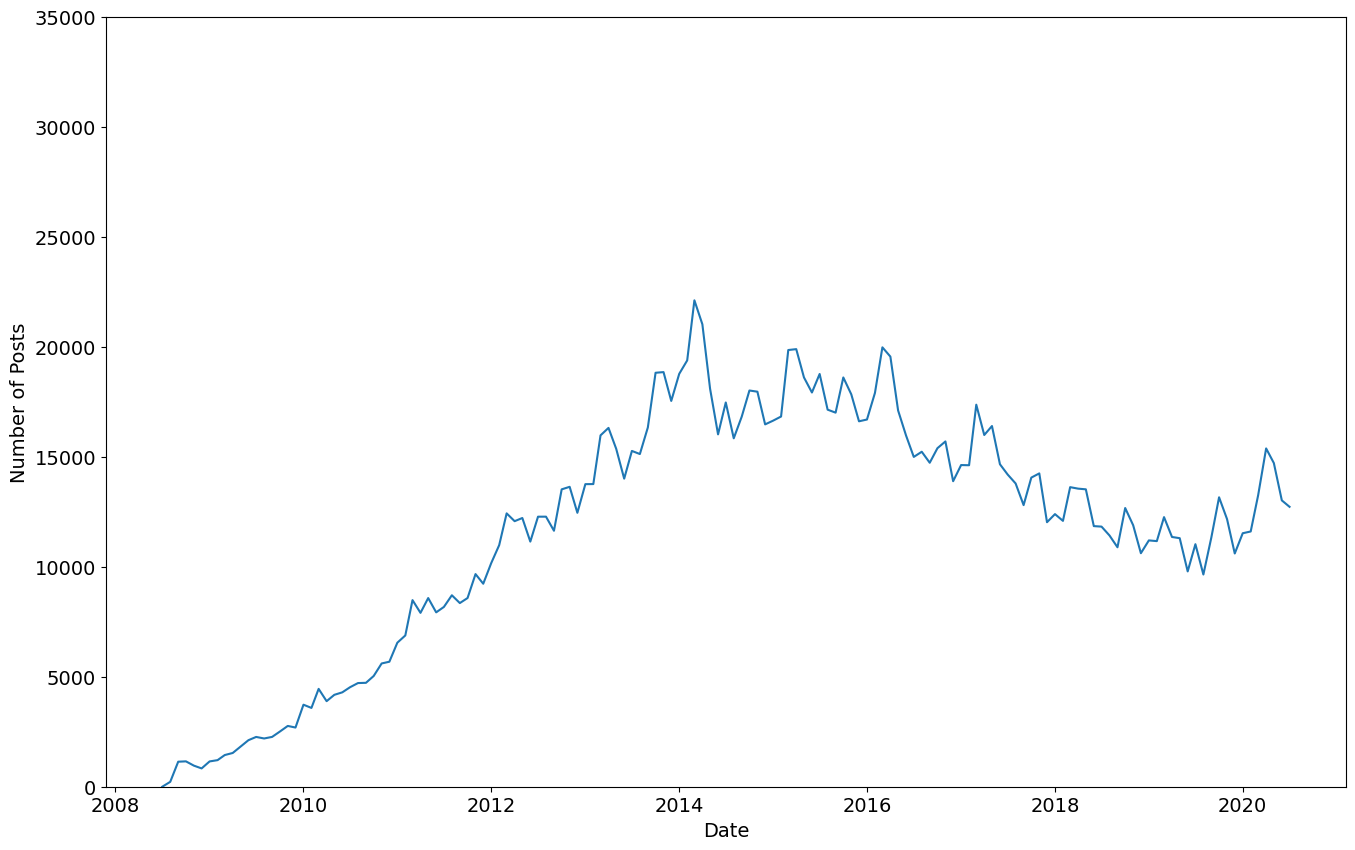

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'])

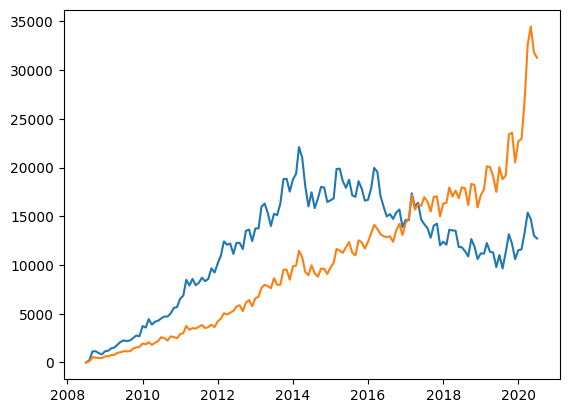

In [36]:
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

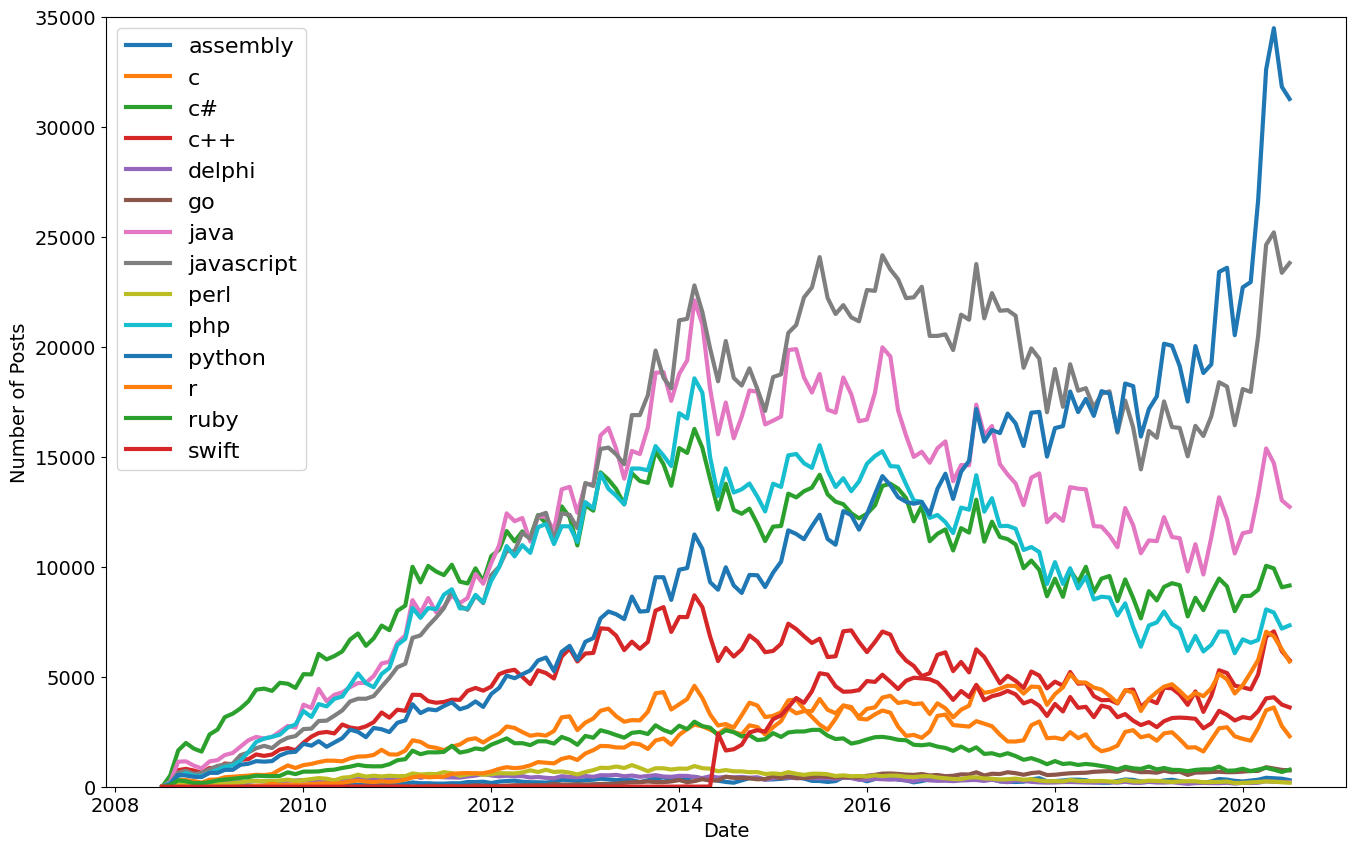

In [42]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

In [45]:
for column in reshaped_df.columns:
    print(reshaped_df[column])

Date
2008-07-01      0.0
2008-08-01      8.0
2008-09-01     28.0
2008-10-01     15.0
2008-11-01     17.0
              ...  
2020-03-01    317.0
2020-04-01    406.0
2020-05-01    386.0
2020-06-01    363.0
2020-07-01    298.0
Name: assembly, Length: 145, dtype: float64
Date
2008-07-01       0.0
2008-08-01      85.0
2008-09-01     321.0
2008-10-01     303.0
2008-11-01     259.0
               ...  
2020-03-01    2670.0
2020-04-01    3472.0
2020-05-01    3602.0
2020-06-01    2757.0
2020-07-01    2294.0
Name: c, Length: 145, dtype: float64
Date
2008-07-01        3.0
2008-08-01      511.0
2008-09-01     1649.0
2008-10-01     1989.0
2008-11-01     1730.0
               ...   
2020-03-01     8954.0
2020-04-01    10042.0
2020-05-01     9923.0
2020-06-01     9064.0
2020-07-01     9145.0
Name: c#, Length: 145, dtype: float64
Date
2008-07-01       0.0
2008-08-01     164.0
2008-09-01     755.0
2008-10-01     811.0
2008-11-01     735.0
               ...  
2020-03-01    5107.0
2020-04-01    6820.0


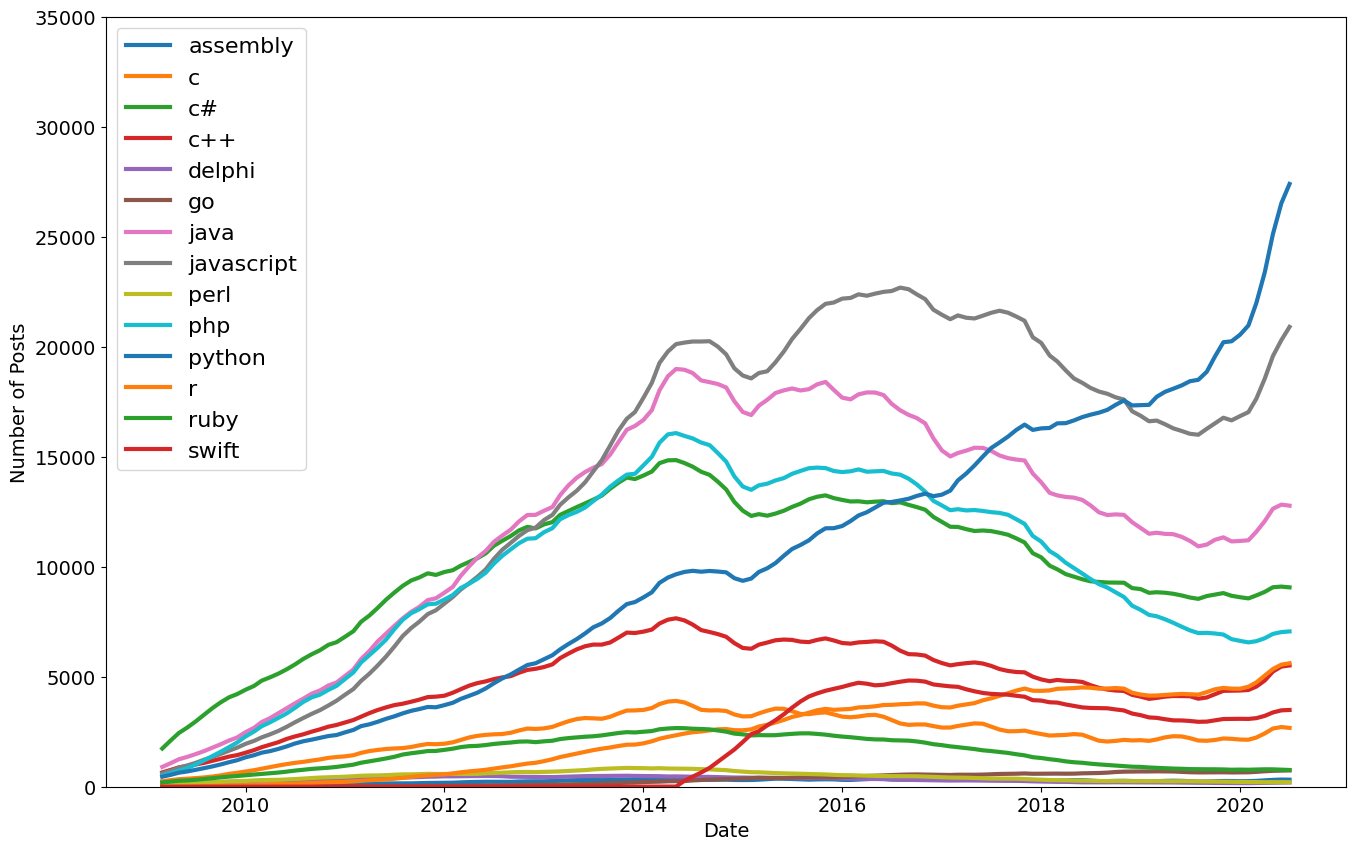

In [58]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)